Lets begin this project which a dataset on Uber rides. We will predict the chances of the rides getting cancelled , completed or left incomplete. We will preform Data cleaning, Data Visualization, Feature Engineering, Applying Class weights, Prediction Model, Find accuracy of tthe model 

We will start will importing important libraries which we will use for this project suxh as pandas, numpy, seaborn, etc.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline 

In [2]:
#Importing dataset
df = pd.read_csv("ncr_ride_bookings.csv")

Now we will perform some basic steps to understand how our dataset is.

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
# .T to change the view of describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg VTAT,139500.0,8.456352,3.773564,2.0,5.30,8.30,11.30,20.0
Avg CTAT,102000.0,29.149636,8.902577,10.0,21.60,28.80,36.80,45.0
Cancelled Rides by Customer,10500.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Cancelled Rides by Driver,27000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Incomplete Rides,9000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Booking Value,102000.0,508.295912,395.805774,50.0,234.00,414.00,689.00,4277.0
Ride Distance,102000.0,24.637012,14.002138,1.0,12.46,23.72,36.82,50.0
Driver Ratings,93000.0,4.230992,0.436871,3.0,4.10,4.30,4.60,5.0
Customer Rating,93000.0,4.404584,0.437819,3.0,4.20,4.50,4.80,5.0


In [6]:
df['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

DATA CLEANING

We will start our first step towards data prediction which is data cleaning. We will remove all the useless data which does not help in prediction Like Booking ID, Customer ID. Then we will try to handle missing data from the dataset. See if we can use something to manage that missing values.

In [7]:
#df = df.drop('Booking ID',axis=1)
df = df[df['Booking Status'] != 'No Driver Found']

In [8]:
df['Payment Method'].unique()

array(['UPI', 'Debit Card', 'Cash', nan, 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'date_column' with your actual column name
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5396\70035924.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [11]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                                  0
Avg CTAT                              37500
Cancelled Rides by Customer          129000
Reason for cancelling by Customer    129000
Cancelled Rides by Driver            112500
Driver Cancellation Reason           112500
Incomplete Rides                     130500
Incomplete Rides Reason              130500
Booking Value                         37500
Ride Distance                         37500
Driver Ratings                        46500
Customer Rating                       46500
Payment Method                        37500
dtype: int64

Now we will find any correlation between the columns to see if we can use it for our benefit

In [14]:
df['Reason for cancelling by Customer'].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [15]:
df['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

In [17]:
df['Driver Cancellation Reason'].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

In [18]:
df['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

In [20]:
df['Vehicle Type'].sort_values(ascending=False).value_counts()

Vehicle Type
Auto             34738
Go Mini          27791
Go Sedan         25181
Bike             21014
Premier Sedan    16831
eBike             9811
Uber XL           4134
Name: count, dtype: int64

In [22]:
df['Drop Location'].value_counts().head(10)

Drop Location
Ashram                883
Basai Dhankot         857
Narsinghpur           854
Lok Kalyan Marg       847
Udyog Vihar           847
Nehru Place           843
Punjabi Bagh          842
Cyber Hub             841
Lajpat Nagar          841
Kashmere Gate ISBT    840
Name: count, dtype: int64

In [23]:
df['Pickup Location'].value_counts().head(10)

Pickup Location
Khandsa             888
Barakhamba Road     888
Saket               866
Badarpur            859
Shivaji Park        856
Madipur             856
AIIMS               855
Pragati Maidan      850
Vishwavidyalaya     847
Dwarka Sector 21    846
Name: count, dtype: int64

DATA VISUALIZATION

Now After data cleaning we will move to data visualization part. We'll use different graphs from seaborn library to get a better understanding of our dataset.

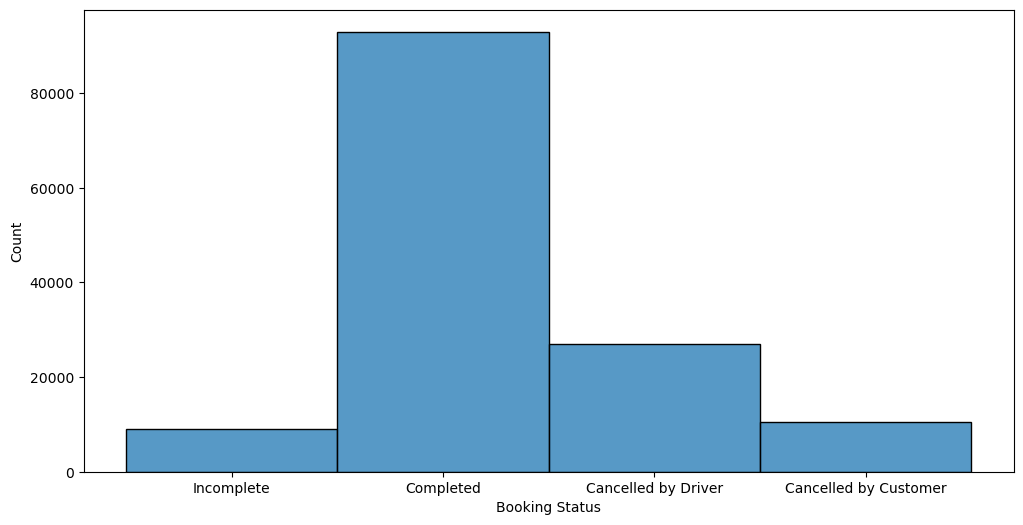

In [71]:
pyplot.figure(figsize=(12,6))
sns.histplot(df['Booking Status'])
pyplot.show()

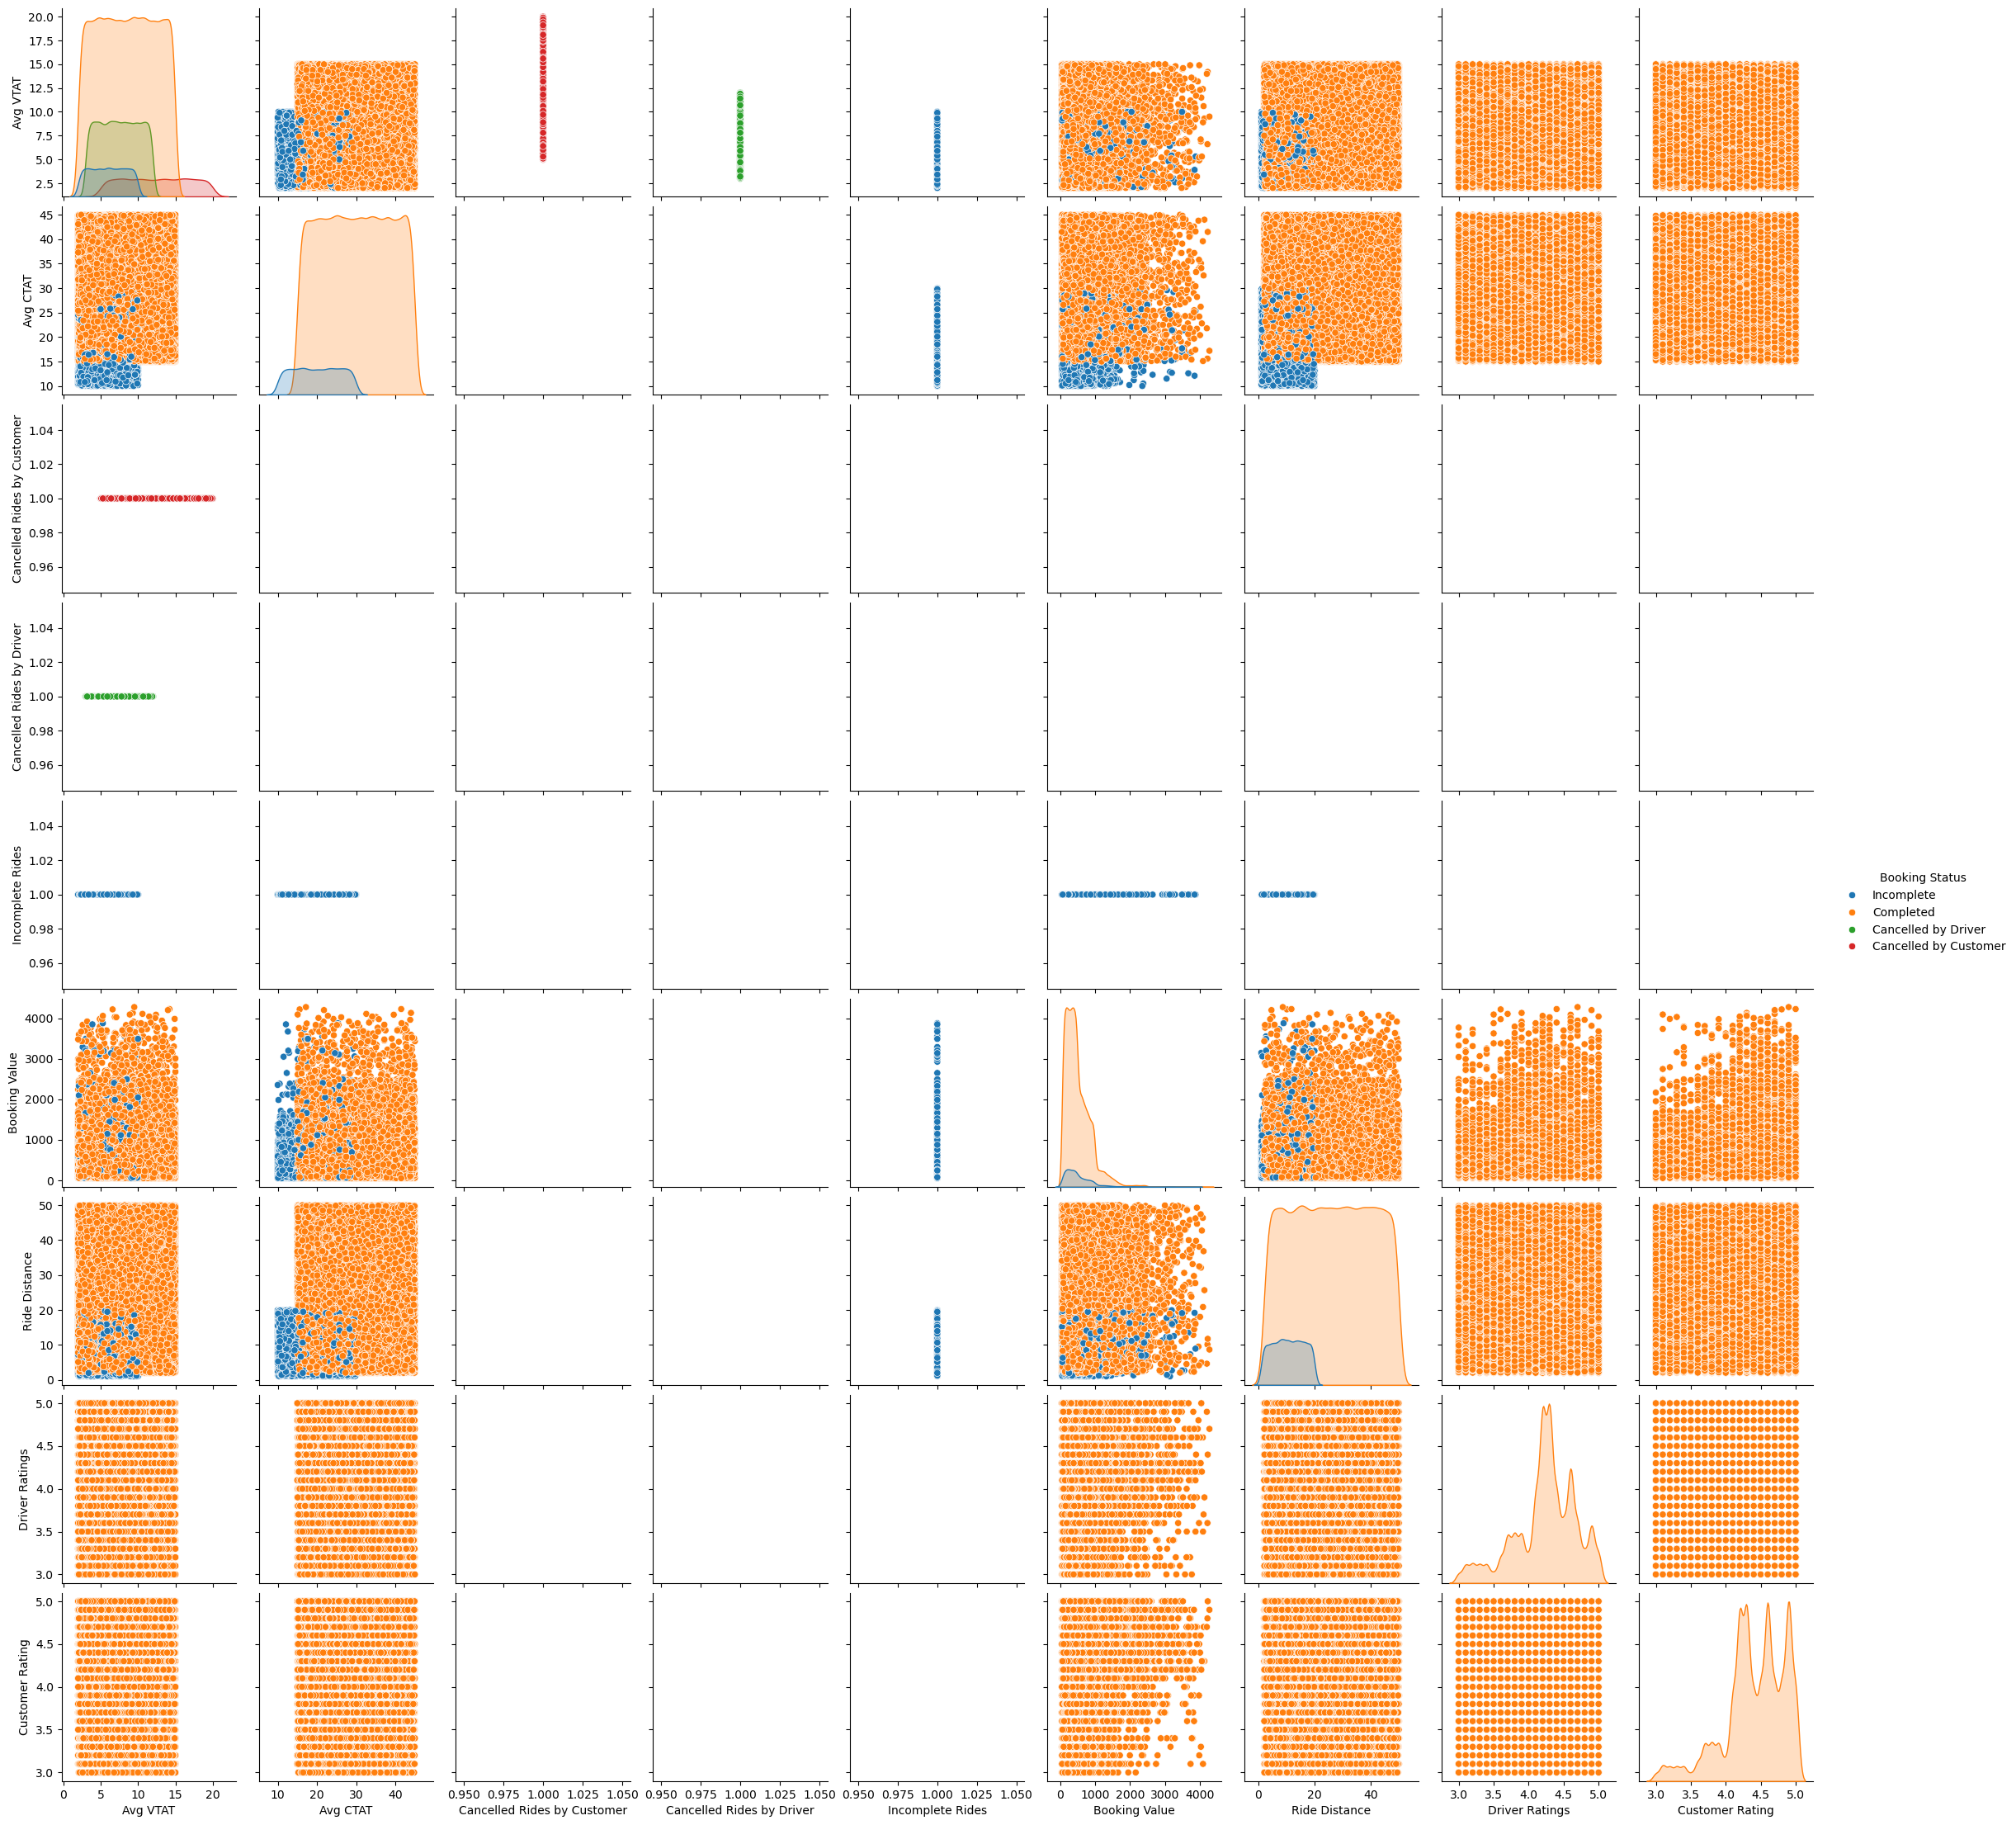

In [70]:
sns.pairplot(data=df,hue='Booking Status')
pyplot.show()

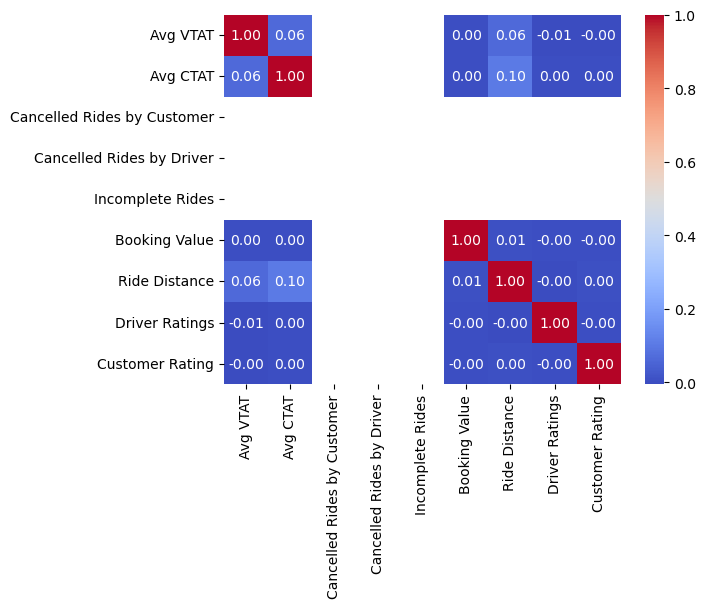

In [69]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap='coolwarm', fmt=".2f")
pyplot.show()

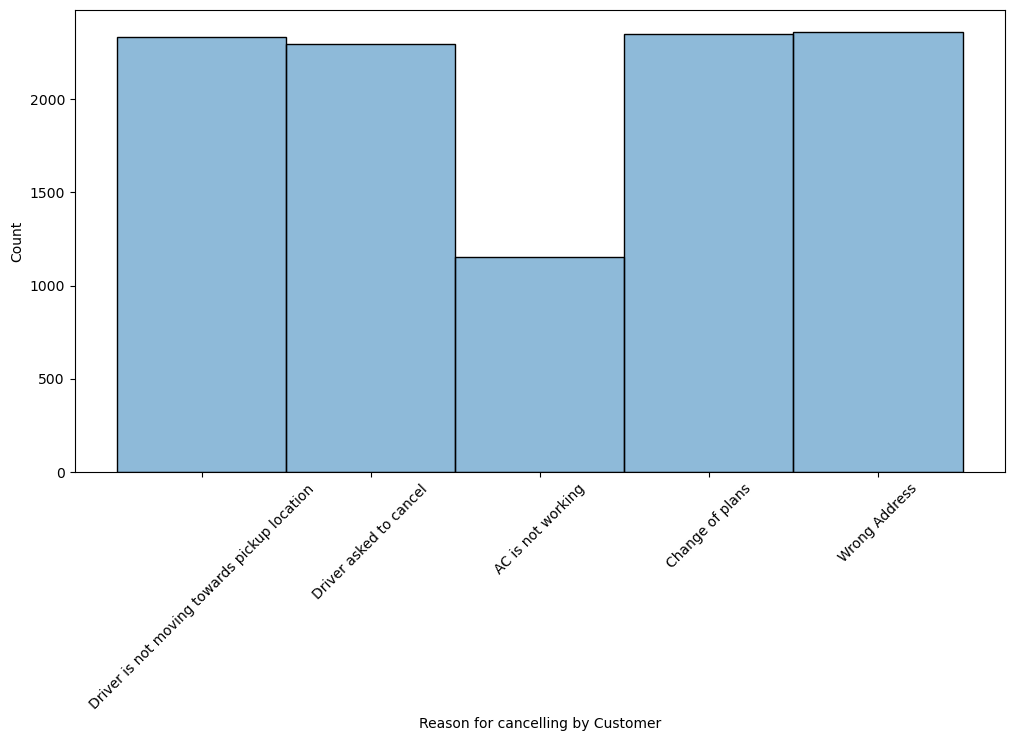

In [16]:
pyplot.figure(figsize=(12,6))
sns.histplot(x=df['Reason for cancelling by Customer'], bins=50, alpha=0.5)
pyplot.xticks(rotation=45)
pyplot.show()

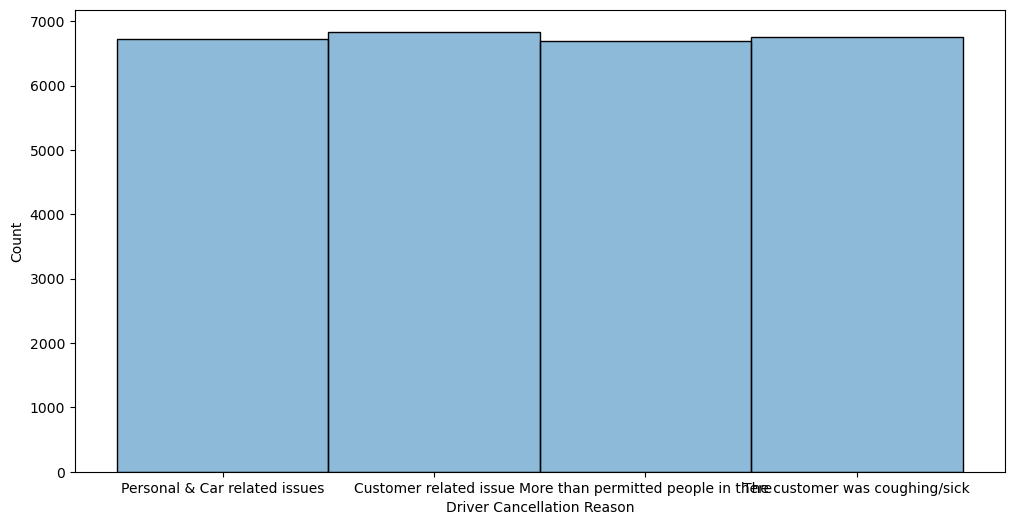

In [19]:
pyplot.figure(figsize=(12,6))
sns.histplot(x=df['Driver Cancellation Reason'], bins=50, alpha=0.5)
pyplot.show()

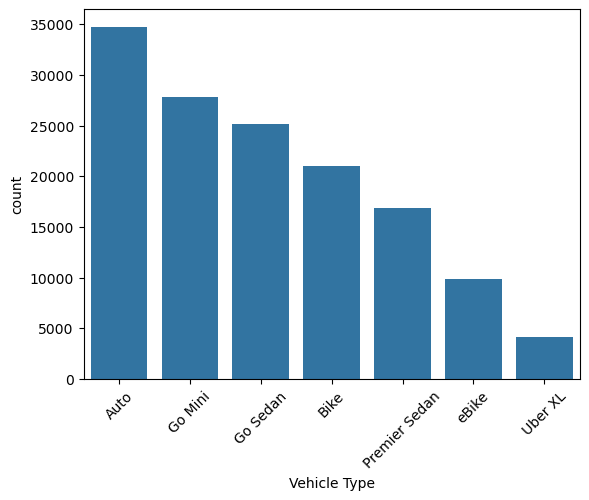

In [21]:
sns.countplot(x=df['Vehicle Type'],order=df['Vehicle Type'].value_counts().index)
pyplot.xticks(rotation=45)
pyplot.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5396\4192199710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['Pickup Location'].value_counts().head(10), ax=axes[0], palette='Blues_r')
C:\Users\HP\AppData\Local\Temp\ipykernel_5396\4192199710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['Drop Location'].value_counts().head(10), ax=axes[1], palette='Greens_r')
C:\Users\HP\AppData\Local\Temp\ipykernel_5396\4192199710.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\HP\AppData\Local\Temp\ipykernel_5396\4192199710.p

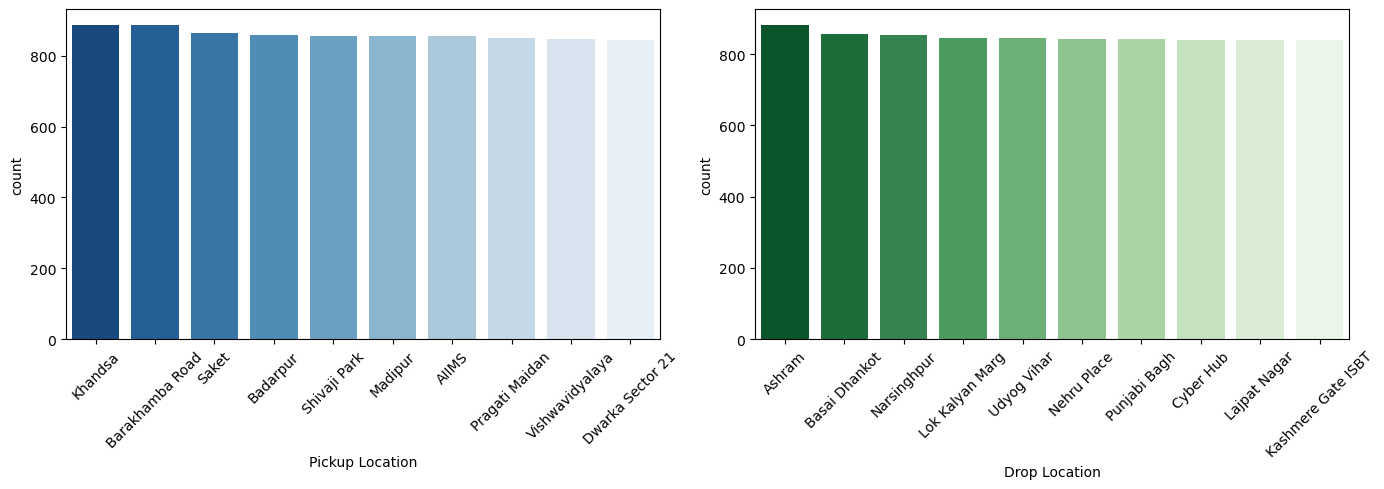

In [24]:
fig, axes = pyplot.subplots(1, 2, figsize=(14,5))
sns.barplot(data=df['Pickup Location'].value_counts().head(10), ax=axes[0], palette='Blues_r')
sns.barplot(data=df['Drop Location'].value_counts().head(10), ax=axes[1], palette='Greens_r')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
pyplot.tight_layout()
pyplot.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5396\876984891.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


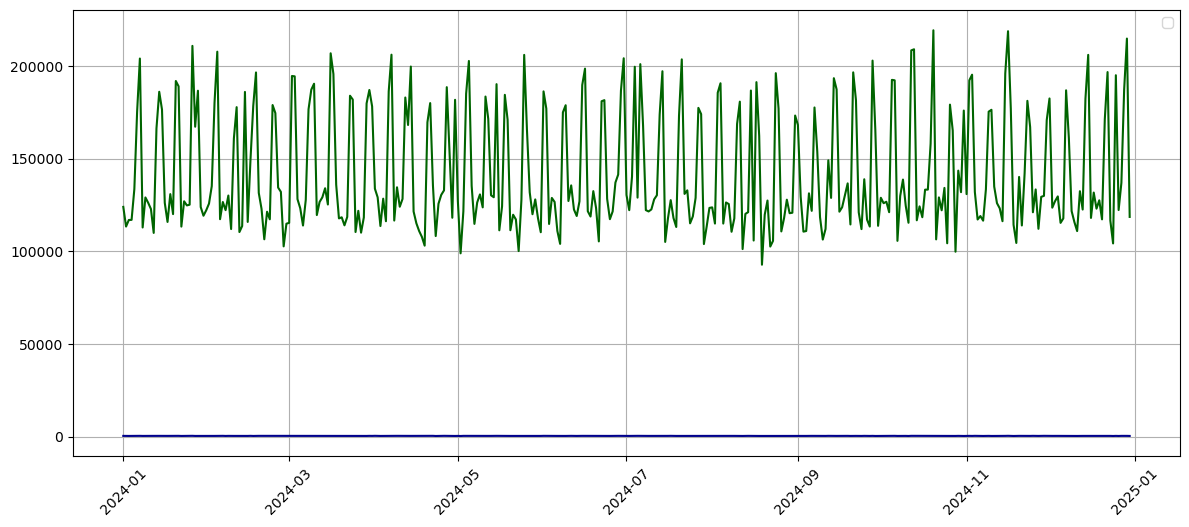

In [25]:
dd= df.groupby('Date').agg({'Booking ID':'count', 'Booking Value':'sum'}).reset_index()
pyplot.figure(figsize=(12,5))
pyplot.grid(True)
pyplot.legend()
pyplot.plot(dd['Date'],dd['Booking ID'],color='darkblue')
pyplot.plot(dd['Date'], dd['Booking Value'], label="Total Revenue", color='darkgreen')
pyplot.tight_layout()
pyplot.xticks(rotation=45)
pyplot.show()

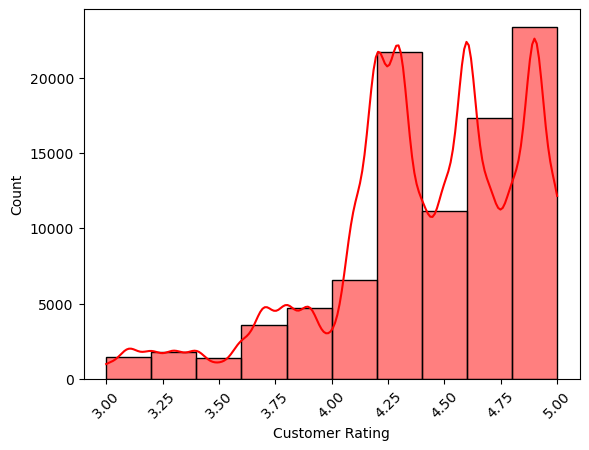

In [26]:
sns.histplot(data=df['Customer Rating'],bins=10,kde=True,color='red')
pyplot.xticks(rotation=45)
pyplot.show()

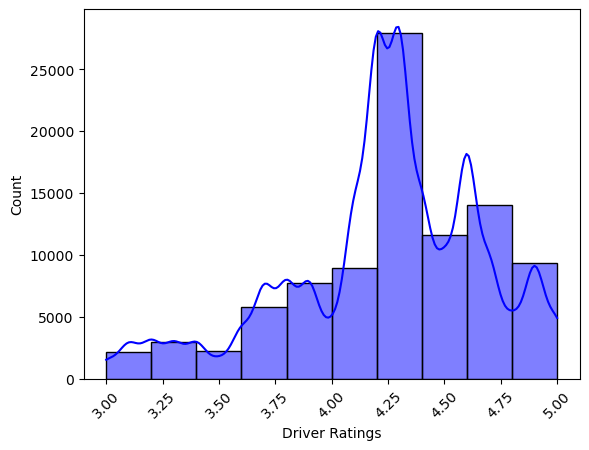

In [27]:
sns.histplot(data=df['Driver Ratings'],bins=10,kde=True,color='blue')
pyplot.xticks(rotation=45)
pyplot.show()

Now we will remove unnecessary columns which hold zero to no importance in the data. so for that we will create a new dataframe called gf

In [45]:
gf = df.drop(['Date','Time','Booking ID','Customer ID','Vehicle Type','Pickup Location','Drop Location'],axis=1)
gf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139500 entries, 1 to 149999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Booking Status                     139500 non-null  object 
 1   Avg VTAT                           139500 non-null  float64
 2   Avg CTAT                           102000 non-null  float64
 3   Cancelled Rides by Customer        10500 non-null   float64
 4   Reason for cancelling by Customer  10500 non-null   object 
 5   Cancelled Rides by Driver          27000 non-null   float64
 6   Driver Cancellation Reason         27000 non-null   object 
 7   Incomplete Rides                   9000 non-null    float64
 8   Incomplete Rides Reason            9000 non-null    object 
 9   Booking Value                      102000 non-null  float64
 10  Ride Distance                      102000 non-null  float64
 11  Driver Ratings                     93000 non

Please NOTE:

Here in this dataset there are a lot of null values also represent as NaN but unlike other dataset this null values actually holds meaningness which will help us predict the model. So we have 2 options here - either assign a value for NaN values due to which we can use Random forest classification, Linear Models, KNN and SVN for predictions OR we can use XGBoost, LightBGM or CatBoost for prediction. 

In my approach, we will be going with the second option and use XGBoost Classifier for predicting our values.

In [46]:
gf.isnull().sum()

Booking Status                            0
Avg VTAT                                  0
Avg CTAT                              37500
Cancelled Rides by Customer          129000
Reason for cancelling by Customer    129000
Cancelled Rides by Driver            112500
Driver Cancellation Reason           112500
Incomplete Rides                     130500
Incomplete Rides Reason              130500
Booking Value                         37500
Ride Distance                         37500
Driver Ratings                        46500
Customer Rating                       46500
Payment Method                        37500
dtype: int64

In [47]:
gf[gf['Booking Status']=='Cancelled by Driver'].head().T
#gf[gf['Booking Status']=='Cancelled by Customer'].head().T
#gf[gf['Booking Status']=='Incomplete'].head().T

,12,17,19,26,30
Booking Status,Cancelled by Driver,Cancelled by Driver,Cancelled by Driver,Cancelled by Driver,Cancelled by Driver
Avg VTAT,4.6,6.0,10.3,11.5,9.2
Avg CTAT,NaN,NaN,NaN,NaN,NaN
Cancelled Rides by Customer,NaN,NaN,NaN,NaN,NaN
Reason for cancelling by Customer,NaN,NaN,NaN,NaN,NaN
Cancelled Rides by Driver,1.0,1.0,1.0,1.0,1.0
Driver Cancellation Reason,Personal & Car related issues,Customer related issue,Customer related issue,Personal & Car related issues,More than permitted people in there
Incomplete Rides,NaN,NaN,NaN,NaN,NaN
Incomplete Rides Reason,NaN,NaN,NaN,NaN,NaN
Booking Value,NaN,NaN,NaN,NaN,NaN


In [48]:
gf['Incomplete Rides Reason'].value_counts()

Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64

In [49]:
gf['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

In [50]:
gf['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

In [51]:
gf = gf.drop(['Cancelled Rides by Customer','Cancelled Rides by Driver','Incomplete Rides'],axis=1)
gf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139500 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Booking Status                     139500 non-null  object 
 1   Avg VTAT                           139500 non-null  float64
 2   Avg CTAT                           102000 non-null  float64
 3   Reason for cancelling by Customer  10500 non-null   object 
 4   Driver Cancellation Reason         27000 non-null   object 
 5   Incomplete Rides Reason            9000 non-null    object 
 6   Booking Value                      102000 non-null  float64
 7   Ride Distance                      102000 non-null  float64
 8   Driver Ratings                     93000 non-null   float64
 9   Customer Rating                    93000 non-null   float64
 10  Payment Method                     102000 non-null  object 
dtypes: float64(6), object(5)
memory usage: 12.8+

So before moving forward we will merge Cancelled by Driver and Cancelled by Customer booking statuses into one value called Cancelled, since both the values represents cancelled rides.

In [52]:
def cancel_combo(x):
    if 'Cancelled' in x:
        return 'Cancelled'
    else:
        return x

In [53]:
gf["Booking Status"] = gf["Booking Status"].apply(lambda x: cancel_combo(x))
gf['Booking Status'].value_counts()

Booking Status
Completed     93000
Cancelled     37500
Incomplete     9000
Name: count, dtype: int64

gf = pd.get_dummies(data=gf,columns=['Booking Status'],drop_first=True)

FEATURE ENGINEERING

We will not perform feature engineering on categorical columns of the dataset which are important for predicting values.

In [54]:
gf = pd.get_dummies(data=gf,columns=['Reason for cancelling by Customer'],drop_first=True)

In [55]:
gf = pd.get_dummies(data=gf,columns=['Driver Cancellation Reason'],drop_first=True)

In [56]:
gf = pd.get_dummies(data=gf,columns=['Incomplete Rides Reason'],drop_first=True)

In [57]:
gf = pd.get_dummies(data=gf,columns=['Payment Method'],drop_first=True)

DATA SCALING  

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [59]:
sc = StandardScaler()

In [60]:
from sklearn.model_selection import train_test_split
X=gf.drop('Booking Status',axis=1)
y=gf['Booking Status']

In [61]:
label = LabelEncoder()
y_encd = label.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encd, test_size=0.3, random_state=101)

✅ Best number of estimators: 500
✅ Best log loss: 0.0000

📌 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11138
           1       1.00      1.00      1.00     28029
           2       1.00      1.00      1.00      2683

    accuracy                           1.00     41850
   macro avg       1.00      1.00      1.00     41850
weighted avg       1.00      1.00      1.00     41850



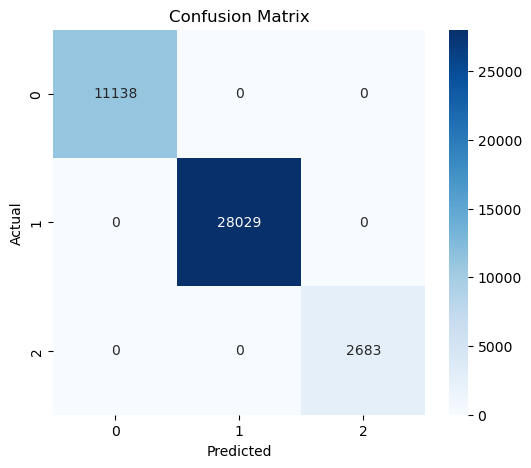

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

best_score = float("inf")
best_model = None
best_n_estimators = None

# Manual early stopping loop
for n_estimators in range(10, 501, 10):  # Try models with 10 to 500 trees
    temp_model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=1,
        random_state=101,
        eval_metric="mlogloss"
    )
    
    # Train temporary model
    temp_model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_prob = temp_model.predict_proba(X_test)
    
    # Evaluate using log loss
    from sklearn.metrics import log_loss
    score = log_loss(y_test, y_pred_prob)
    
    # Check if model improved
    if score < best_score:
        best_score = score
        best_model = temp_model
        best_n_estimators = n_estimators
    else:
        # Stop when validation score starts increasing (overfitting detected)
        break

print(f"✅ Best number of estimators: {best_n_estimators}")
print(f"✅ Best log loss: {best_score:.4f}")

# Use the best model for predictions
y_pred = best_model.predict(X_test)

# -----------------------
# 📌 Classification Report
# -----------------------
print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))

# -----------------------
# 📌 Confusion Matrix
# -----------------------
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)  # Extract class labels

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [64]:
from sklearn.metrics import log_loss

best_score = float("inf")
best_model = None

for n_estimators in range(10, 501, 10):
    temp_model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=1,
        random_state=101,
        eval_metric='mlogloss'
    )
    temp_model.fit(X_train, y_train)
    y_pred_prob = temp_model.predict_proba(X_test)
    score = log_loss(y_test, y_pred_prob)
    
    if score < best_score:
        best_score = score
        best_model = temp_model
    else:
        break

model = best_model

In [65]:
y_pred = model.predict(X_test)

FINAL COMPARISION

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [67]:
print(classification_report(y_test, y_pred, target_names=label.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

   Cancelled       1.00      1.00      1.00     11138
   Completed       1.00      1.00      1.00     28029
  Incomplete       1.00      1.00      1.00      2683

    accuracy                           1.00     41850
   macro avg       1.00      1.00      1.00     41850
weighted avg       1.00      1.00      1.00     41850

Accuracy: 1.0
[[11138     0     0]
 [    0 28029     0]
 [    0     0  2683]]


In [68]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0
